In [1]:
sys.path.insert(0, './common')

import sys
import wave
import qlearning_target_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=45, timescale=30)

WAVE environment created.


In [4]:
model = qlearning_target_model.QLearning(127, 2, 512)

In [5]:
save_path = './results/env01/qlearning_target/final-bro'
model.set_model_save_path(save_path)

In [6]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


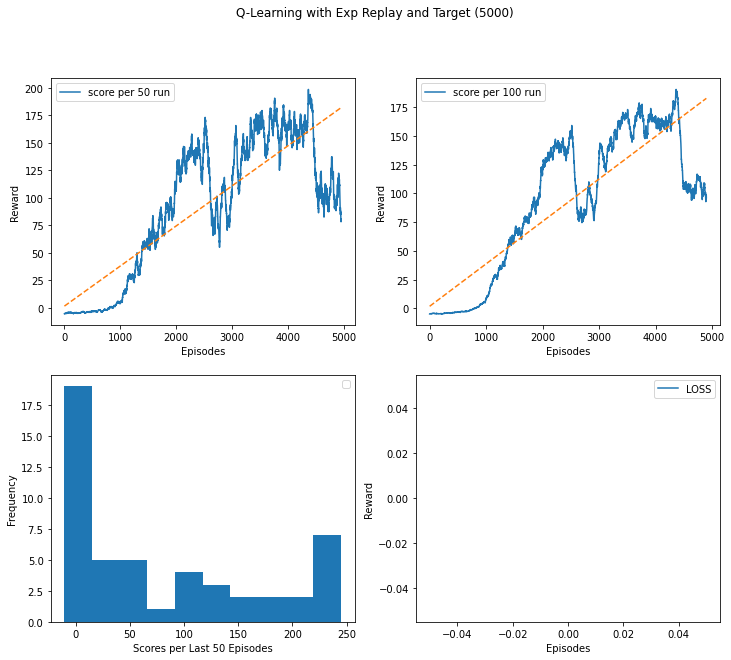

Model saved
Training history saved
saved to ./results/env01/qlearning_target/final-bro
EPOCH: 4999, total reward: 22.409992218017578, timestep: 152, epsilon: 0.009998671593271896, lr: 3.874204890000002e-05


In [6]:
model.set_train_params(max_step=1000, batch_size=512, start_epsilon=1, mem_size=1_000_000, min_epsilon=0.01)
model.train(env, 5000, show_plot=True)

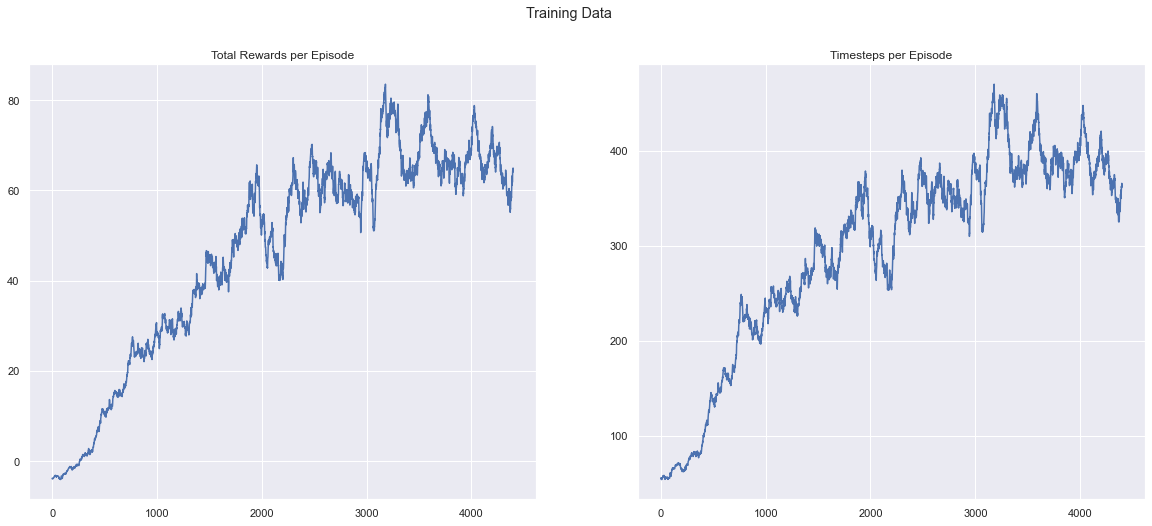

In [7]:
model.plot_train_memory(smooth=100)

In [8]:
model.save_model()

Model saved
Training history saved


In [14]:
env = wave.WaveEnv(env_path, 40, worker_id=45)
model.test(env)

WAVE environment created.


In [7]:
model.test_avg(env, 10)

209.99997335672379 1000
189.99997985363007 1000
199.99997279047966 1000
239.9999688565731 1000
219.99997201561928 1000
244.99996580183506 1000
194.99997298419476 1000
174.99998043477535 1000
179.999976426363 1000
239.99997076392174 1000


([209.99997335672379,
  189.99997985363007,
  199.99997279047966,
  239.9999688565731,
  219.99997201561928,
  244.99996580183506,
  194.99997298419476,
  174.99998043477535,
  179.999976426363,
  239.99997076392174],
 [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
 209.49997332841158,
 1000.0)

In [ ]:
# qlearning 10,000 episode (386.0179519353807, 1598.09)

In [12]:
env.close()